# Model of genetic evolution

In [1]:
import numpy as np
import random as rd

from ripser import ripser
from persim import plot_diagrams
import subprocess
import re

In [2]:
rd.randint(0,5)

4

## Function for point mutations
inputs:  
word = word to mutate (string)  

outputs:  
mutation = mutated word (string)

In [3]:
def point_mutation(word):
    
    if not set(word).issubset(('A','C','G','T')):
        return 'error'
    
    alphabet = ['A','C','G','T']
        
    pos = rd.randint(0,len(word)-1)
    letter_index = alphabet.index(word[pos])
    shift = rd.randint(1,3)
    mutation = word[:pos] + alphabet[(letter_index+shift) % 4] + word[pos+1:]
    
    return mutation

In [4]:
def point_mutation_ish(word):
    
    if not set(word).issubset(('A','C','G','T')):
        return 'error'
    
    if 'A' not in set(word):
        return word
    
    alphabet = ['A','C','G','T']
    letter = ''

    while letter != 'A':
        pos = rd.randint(0,len(word)-1)
        letter = word[pos]

    letter_index = alphabet.index(letter)
    shift = rd.randint(1,3)
    mutation = word[:pos] + alphabet[(letter_index+shift) % 4] + word[pos+1:]
    
    return mutation

In [59]:
point_mutation_ish('CCCCCCCC')

'CCCCCCCC'

## Function for evolution
inputs:  
start = starting word (string)   
num_gen = number of generations (int)  
max_pm = maximum number of mutations per word (int)  

outputs:  
evol = evolved words (dictionary) - keys: (generation, starting word) / values: list of mutateted words  
wordlist = list of generated words (list)


In [19]:
def evolution(start, num_gen, max_pm):
    
    evol = {}
    evol[(0,start)] = [start]
    starts = [start]
    
    for g in range(num_gen):
        newstarts = []
        
        for word in starts:
            num_mut = rd.randint(0,max_pm)
            
            if num_mut == 0:
                mutated = [word]
            
            else:
                mutated = [word]
            
                for i in range(num_mut):
                    mutation = point_mutation(word)
                    mutated.append(mutation)
                
            evol[(g+1, word)] = mutated
            newstarts.extend(mutated)
            
        starts = newstarts
    
    wordlist = list(set([item for mutated in list(evol.values()) for item in mutated]))
            
    return evol, wordlist

num_gen = number of generations    
max_pm = maximum number of point mutations per word  
l = length of words

In [37]:
num_gen = 5
max_pm = 3
l = 8

In [38]:
start = l*'A'
print(start)

AAAAAAAA


In [39]:
evol, wordlist = evolution(start, num_gen, max_pm)

In [40]:
evol

{(0, 'AAAAAAAA'): ['AAAAAAAA'],
 (1, 'AAAAAAAA'): ['AAAAAAAA', 'AAAAAGAA', 'AAAAAAGA', 'AAAAATAA'],
 (2, 'AAAAAAAA'): ['AAAAAAAA', 'AAAACAAA', 'AAAACAAA', 'AAAAAACA'],
 (2, 'AAAAAGAA'): ['AAAAAGAA'],
 (2, 'AAAAAAGA'): ['AAAAAAGA', 'AAAAAAGG', 'AAAAAAAA'],
 (2, 'AAAAATAA'): ['AAAAATAA', 'AAAAATAG'],
 (3, 'AAAAAAAA'): ['AAAAAAAA', 'AAACAAAA'],
 (3, 'AAAACAAA'): ['AAAACAAA'],
 (3, 'AAAAAACA'): ['AAAAAACA', 'AAAAGACA', 'AAAATACA', 'GAAAAACA'],
 (3, 'AAAAAGAA'): ['AAAAAGAA', 'AATAAGAA', 'AAAAAGAG', 'AAATAGAA'],
 (3, 'AAAAAAGA'): ['AAAAAAGA'],
 (3, 'AAAAAAGG'): ['AAAAAAGG'],
 (3, 'AAAAATAA'): ['AAAAATAA'],
 (3, 'AAAAATAG'): ['AAAAATAG', 'AAAAATAC', 'AAAAATAC'],
 (4, 'AAAAAAAA'): ['AAAAAAAA', 'AAAAAGAA', 'AAAAAACA'],
 (4, 'AAAAAAAG'): ['AAAAAAAG', 'AATAAAAG', 'ATAAAAAG', 'AGAAAAAG'],
 (4, 'AAAACAAA'): ['AAAACAAA', 'GAAACAAA', 'AAACCAAA', 'AGAACAAA'],
 (4, 'ATAACAAA'): ['ATAACAAA', 'ATAACAAC', 'ATAGCAAA', 'ATAACTAA'],
 (4, 'AAAAAACA'): ['AAAAAACA', 'AAAATACA', 'AAAAAAGA'],
 (4, 'AAAAGACA'): ['

In [41]:
wordlist

['CAAATTAG',
 'GTAAAACA',
 'AGAACAAA',
 'AAAACTAC',
 'GAAATAAA',
 'CAACAAAA',
 'AAACAAAT',
 'AAACAACA',
 'ATAAAAAA',
 'ATCAAAGG',
 'AAATAGAA',
 'AAAAAAGC',
 'AAACCAAA',
 'AAAAAAAA',
 'AAAAATAC',
 'ATAACAAA',
 'TAAACACA',
 'AAAAGAAA',
 'AGAAAGAG',
 'AATAAGAA',
 'AGAAAGGG',
 'AAAAACAA',
 'TAAAAACA',
 'CAACCAAA',
 'AAAAAACA',
 'ATAAAAAG',
 'AACATAGA',
 'AAAAAAGG',
 'AAAAATGC',
 'AAACGAAA',
 'AATATACA',
 'ATAAAACA',
 'AATAAGAT',
 'AATAAGAC',
 'AAAAATAA',
 'ATAACAAT',
 'GAAAAGAA',
 'AAAAGACA',
 'ATAACTGA',
 'AATATGAA',
 'GATAAAAG',
 'TAAAGACT',
 'ACAAATAG',
 'AAAATAGC',
 'AAGCGAAA',
 'ACAAAAGA',
 'AAATAGAG',
 'AAAACAAC',
 'ACACGAAA',
 'GAAACAAA',
 'TATATACA',
 'AAAACAAA',
 'ATAAATAG',
 'AAAATACA',
 'GAACGAAA',
 'AAAATAAG',
 'GAAAAACA',
 'TAATGACA',
 'AAAAAAGA',
 'ATAAAAGG',
 'AAATTAGA',
 'AAAAGAGA',
 'AATAAAAG',
 'TAAATACA',
 'AAAAAGAG',
 'CAAAATAG',
 'AAATATAG',
 'AAACTAAT',
 'AAATACAG',
 'ATAGCTAA',
 'CATATACA',
 'AAAATAGA',
 'ATAACAAC',
 'ACAACTAG',
 'AAAAAAGT',
 'AAAACTAA',
 'TAAAGCCA',

n = #words

In [42]:
n = len(wordlist)
print(n)

101


## Save evolution and wordlist to text file

In [43]:
with open('evol.txt', 'w') as f:
    print(evol, file=f)
    
with open('wordlist.txt', 'w') as f:
    print(wordlist, file=f)

## Implement Hamming-Distance

In [45]:
def dist(x,y):
    
    if len(x) != len(y):
        d = 'error'
        
    else:
        d = 0
    
        for i in range(len(x)):
            
            if x[i] != y[i]:
                d += 1
    
    return d

## Calculate distance matrix D

In [46]:
D = np.zeros((n,n))

for i in range(n):
    
    for j in range(i):
        D[i,j] = dist(wordlist[i],wordlist[j])

D = D+D.T

np.savetxt("dm_words.csv", D, delimiter=",")

## Calculate persistent homology

In [47]:
ph = ripser(D, distance_matrix=True, maxdim=1)

## Print persistent intervals in dim 1

In [48]:
pi = ph['dgms']
print(pi[1])

[[2. 3.]
 [2. 3.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]
 [1. 2.]]


## Plot persistent intervals

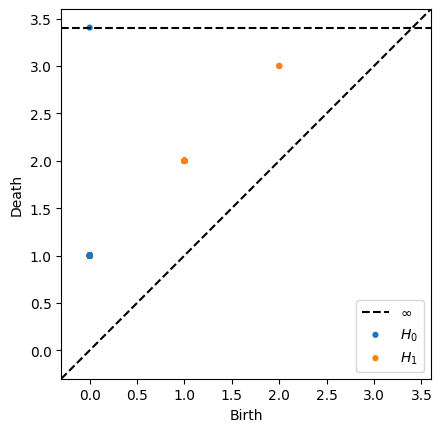

In [49]:
plot_diagrams(pi, show=True)

## Function to calculate representative cycles  
inputs: dm_text = distance matrix text file (string)  
outputs: representative_cycles (dictionary) - keys: enumeration of 1-cycle (int) / values: (list of edges, persistent interval) (tupel)

In [51]:
def representative_cycles(dm_text):
    
    with open('ripser_localization.txt', 'w') as file:
        subprocess.run(['./ripser-representatives', dm_text], stdout=file)
        
    file = open('ripser_localization.txt')
    lines = file.read().splitlines()
    file.close()
    
    starting_lines = []

    for i in range(len(lines)):
        
        if 'persistence intervals' in lines[i]:
            starting_lines.append(i)
        
    representative_cycles = {}
    num = 1
    
    for i in range(starting_lines[-1]+1,len(lines)):
        item = lines[i]
        split = item.split(':  ')
        interval = split[0][2:-1]
        interval = tuple(map(float, interval.split(',')))
        edges = split[1].split(', ')
        
        for j in range(len(edges)):
            match = re.search(r'\[(.+)\]', edges[j])
            
            if match:
                edges[j] = match.group(0)[1:-1]
                edges[j] = tuple(map(int,edges[j].split(',')))
        
        representative_cycles[num] = (edges,interval)
        num += 1
        
    return representative_cycles

In [52]:
rc = representative_cycles('dm_words.csv')

In [53]:
rc

{1: ([(37, 53), (37, 61), (53, 71), (61, 71)], (1.0, 2.0)),
 2: ([(24, 53), (24, 58), (53, 71), (58, 71)], (1.0, 2.0)),
 3: ([(13, 51), (17, 51), (13, 58), (17, 61), (58, 71), (61, 71)], (1.0, 2.0)),
 4: ([(13, 58), (13, 79), (58, 98), (79, 98)], (1.0, 2.0)),
 5: ([(24, 56), (24, 58), (56, 98), (58, 98)], (1.0, 2.0)),
 6: ([(17, 51),
   (49, 51),
   (17, 61),
   (58, 71),
   (61, 71),
   (49, 79),
   (58, 98),
   (79, 98)],
  (1.0, 2.0)),
 7: ([(13, 79), (13, 88), (34, 88), (34, 97), (58, 97), (58, 98), (79, 98)],
  (1.0, 2.0)),
 8: ([(49, 51),
   (34, 75),
   (49, 79),
   (51, 90),
   (75, 90),
   (34, 97),
   (58, 97),
   (58, 98),
   (79, 98)],
  (1.0, 2.0)),
 9: ([(14, 28), (14, 96), (34, 96), (28, 97), (34, 97)], (1.0, 2.0)),
 10: ([(11, 28), (11, 74), (58, 74), (28, 97), (58, 97)], (1.0, 2.0)),
 11: ([(27, 74),
   (58, 74),
   (27, 89),
   (64, 89),
   (34, 96),
   (64, 96),
   (34, 97),
   (58, 97)],
  (1.0, 2.0)),
 12: ([(34, 88), (64, 88), (34, 96), (64, 96)], (1.0, 2.0)),
 13

## Find words representing the cycles

In [55]:
for i in list(rc.keys()):
    print('{}. cycle:'.format(i))
    
    for edge in rc[i][0]:
        print(wordlist[edge[0]], wordlist[edge[1]])
        
    print()

1. cycle:
AAAAGACA AAAATACA
AAAAGACA AAAAGAGA
AAAATACA AAAATAGA
AAAAGAGA AAAATAGA

2. cycle:
AAAAAACA AAAATACA
AAAAAACA AAAAAAGA
AAAATACA AAAATAGA
AAAAAAGA AAAATAGA

3. cycle:
AAAAAAAA AAAACAAA
AAAAGAAA AAAACAAA
AAAAAAAA AAAAAAGA
AAAAGAAA AAAAGAGA
AAAAAAGA AAAATAGA
AAAAGAGA AAAATAGA

4. cycle:
AAAAAAAA AAAAAAGA
AAAAAAAA GAAAAAAA
AAAAAAGA GAAAAAGA
GAAAAAAA GAAAAAGA

5. cycle:
AAAAAACA GAAAAACA
AAAAAACA AAAAAAGA
GAAAAACA GAAAAAGA
AAAAAAGA GAAAAAGA

6. cycle:
AAAAGAAA AAAACAAA
GAAACAAA AAAACAAA
AAAAGAAA AAAAGAGA
AAAAAAGA AAAATAGA
AAAAGAGA AAAATAGA
GAAACAAA GAAAAAAA
AAAAAAGA GAAAAAGA
GAAAAAAA GAAAAAGA

7. cycle:
AAAAAAAA GAAAAAAA
AAAAAAAA AAAAAGAA
AAAAATAA AAAAAGAA
AAAAATAA AAAAATGA
AAAAAAGA AAAAATGA
AAAAAAGA GAAAAAGA
GAAAAAAA GAAAAAGA

8. cycle:
GAAACAAA AAAACAAA
AAAAATAA AAAACTAA
GAAACAAA GAAAAAAA
AAAACAAA AAAACCAA
AAAACTAA AAAACCAA
AAAAATAA AAAAATGA
AAAAAAGA AAAAATGA
AAAAAAGA GAAAAAGA
GAAAAAAA GAAAAAGA

9. cycle:
AAAAATAC AAAAATGC
AAAAATAC AAAAATAG
AAAAATAA AAAAATAG
AAAAATGC AAAAATGA
AA